Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/04_Classification'
except ImportError as e:
    pass

## Exercise 4: Classification

### 4.1. Learning a classifier for the Iris Data Set – Part II

In the last exercise, you have learned classification models for the Iris dataset using a train/test split. Now try learning a decision tree and evaluate it with 10-fold cross-validation. Use a pipeline to perform some preprocessing before learning or applying the decision tree classifier. For this exercise, we use the ```iris_imbalanced.csv``` dataset, so it's a good idea to include a balancing step in the preprocessing!

#### 4.1.1.	Discretise the Iris data set into three bins. Then use the DecisionTreeClassifier with a 10-fold stratified cross validation and compute the accuracy. Afterwards plot the decision tree.

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Windows users: either add the path to graphviz' dot.exe to your PATH variable 
## OR comment in the 2 lines below (may have to change path):

# import os
# os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'

# load the dataset
iris = pd.read_csv("iris_imbalanced.csv")
iris_data = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_target = iris['Name']

# define a pipeline including a discretiser, balancing, and a decision tree classifier
#TODO: INSERT YOUR CODE HERE!

# evaluate the pipeline
accuracy = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

# fit the pipeline to the dataset 
pipeline.fit(iris_data, iris_target)

print("Fitted a decision tree with {} nodes. Cross-validated accuracy is {}%".format(estimator.tree_.node_count, accuracy.mean() * 100))

# plot the decision tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(estimator,
               feature_names=iris_data.columns, 
               class_names=iris_target.unique())
plt.show()

#### 4.1.2.	Remove the discretization and adjust the max_depth parameter of DecisionTreeClassifier to increase the accuracy. Does the accuracy change? Compare the complexity of the two models. Which model should be preferred according to Occam’s razor?

In [ ]:
# disable the discretiser
#TODO: INSERT YOUR CODE HERE!

# re-evaluate the pipeline
accuracy = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

# fit the pipeline to the dataset again
pipeline.fit(iris_data, iris_target)

print("Fitted a decision tree with {} nodes. Cross-validated accuracy is {}%".format(estimator.tree_.node_count, accuracy.mean() * 100))

# plot the decision tree
plt.figure(figsize=(20,15))
tree.plot_tree(estimator,
               feature_names=iris_data.columns, 
               class_names=iris_target.unique())
plt.show()

In [ ]:
# adjust the max_depth parameter and re-evaluate
for depth in range(1, 9):
    #TODO: INSERT YOUR CODE HERE!
    
    accuracy = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')
    print("max_depth={}: {}% accuracy".format(depth, accuracy.mean()*100))

In [ ]:
# choose a good parameter setting and re-fit the pipeline to the dataset
#TODO: INSERT YOUR CODE HERE!


pipeline.fit(iris_data, iris_target)

plt.figure(figsize=(20,10))
tree.plot_tree(estimator,
               feature_names=iris_data.columns, 
               class_names=iris_target.unique())
plt.show()

Which model would you choose?

### 4.2. Who should get a bank credit?
The German credit data set from the UCI data set library (http://archive.ics.uci.edu/ml/index.html) describes the customers of a bank with respect to whether they should get a bank credit or not. The data set is provided as credit-g.arff file in ILIAS. 

#### 4.2.1. Plot ROC curves for k-NN (different k values) and Decision Tree (you can use the given avg_roc function) . Which classification approach looks most promising to you?

In [2]:
from scipy.io import arff
import pandas as pd

credit_arff_data, credit_arff_meta = arff.loadarff(open('credit-g.arff', 'r'))
credit = pd.DataFrame(credit_arff_data)
# select all columns of type object
columns_with_binary_strings = credit.select_dtypes('object').columns.values

# decode the values of these columns using utf-8
credit[columns_with_binary_strings] = credit[columns_with_binary_strings].apply(lambda x: x.str.decode("utf-8"))
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


First define the preprocessing. Have a look at the class distribution and feature types and think about appropriate transformations.

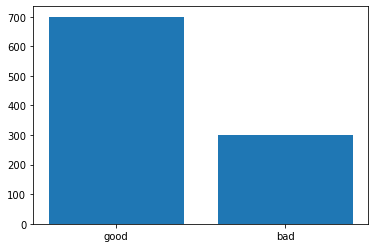

In [11]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# separate the target variable from the features
credit_target = credit['class']
credit_data = credit.drop('class', axis=1)

# plot the class distribution
#TODO: INSERT YOUR CODE HERE!
amounts = pd.Series(credit_target).value_counts()
plt.bar(amounts.index, amounts)
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = ["duration", "installment_commitment", "age", "credit_amount", "existing_credits", "num_dependents"]
numeric_encoder = Pipeline([ ('scaler', StandardScaler()) ])

categorical_features = ["credit_history", "purpose", "personal_status", "other_parties", "property_magnitude", "other_payment_plans", "housing", "job"]
categorical_encoder = Pipeline([ ('onehot', OneHotEncoder()) ])

ordinal_features = ["employment", "checking_status", "savings_status", "own_telephone", "foreign_worker"]
ordinal_encoder = Pipeline([ ('ordinal', OrdinalEncoder()) ])

transformer = ColumnTransformer(transformers=[
        ('num', numeric_encoder, numeric_features),
        ('cat', categorical_encoder, categorical_features),
        ('ord', ordinal_encoder, ordinal_features)])
# think about which features you want to re-scale, encode using one-hot encoding or encode using ordinal encoding
# then, create a ColumnTransformer to execute this preprocessing for you

display(transformer.fit_transform(credit_data))


array([[-1.23647786,  0.91847717,  2.76645648, ...,  4.        ,
         1.        ,  1.        ],
       [ 2.24819436, -0.87018333, -1.19140394, ...,  2.        ,
         0.        ,  1.        ],
       [-0.73866754, -0.87018333,  1.18331231, ...,  2.        ,
         0.        ,  1.        ],
       ...,
       [-0.73866754,  0.91847717,  0.21583532, ...,  2.        ,
         0.        ,  1.        ],
       [ 1.9992892 ,  0.91847717, -1.10345149, ...,  2.        ,
         1.        ,  1.        ],
       [ 1.9992892 ,  0.02414692, -0.75164167, ...,  0.        ,
         0.        ,  1.        ]])

Run the following cell once to define the ```avg_roc``` function:

In [15]:
#define function for computing average roc for cross validation
#see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from scipy import interp
from sklearn.metrics import roc_curve, auc

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []
    
    for train_indices, test_indices in cv.split(data, target):
        train_data = data.iloc[train_indices]
        train_target = target[train_indices]
        estimator.fit(train_data, train_target)

        test_data = data.iloc[test_indices]
        test_target = target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)#have to use predict_proba or decision_function 
    
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] access the last element
        aucs.append(auc(fpr, tpr))
        
        #plt.plot(fpr, tpr)# plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    return mean_fpr, mean_tpr, mean_auc, std_auc

The evaluate different classifiers using the ```avg_roc``` function and plot the results:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# define the cross validation folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the pipeline, we will set the estimator later
pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', None) ])

# setup a figure
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal

# KNN
#TODO: INSERT YOUR CODE HERE!
pipeline.set_params(estimator=KNeighborsClassifier())
for n_neighbour in [2,3,4,5,6]:
    pipeline.set_params(estimator__n_neighbors=n_neighbour)
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, credit_data, credit_target, 'good')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))
    
# Decision Tree
#TODO: INSERT YOUR CODE HERE!
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, credit_data, credit_target, 'good')
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

# show the plot
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

#### 4.2.2.	For the two most promising classification approaches, compute the accuracy and confusion matrix in a 10-fold CV setup. Which level of accuracy do you reach?

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Plot confusion matrix and classification report for the two most promising approaches


#### 4.2.3.	What do the precision and recall values for the class “bad”  tell you? Try to improve the situation by increasing the number of “bad” examples in the training set (in the cross validation). How do precision and recall change if you apply this procedure? 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# upsample the "bad" examples and evaluate


#### 4.2.4.	To model a use case specific evaluation, compute the cost of all missclassifications. Set up your cost matrix by assuming that you will lose 1 Unit if you refuse a credit to a good customer, but that you lose 100 Units if you give a bad customer a credit. Rerun the experiments and evaluate the results.

In [ ]:
from sklearn.metrics import confusion_matrix

# create the predictions here
# prediction = ...

# You can use the following code to calculate the cost
cm = confusion_matrix(credit_target, prediction, labels=credit_target.unique())
cost = cm[0][1] * 100 + cm[1][0] * 1
acc = accuracy_score(credit_target, prediction)
print("6-NN with accuracy of {} and cost {}".format(acc, cost))

#### 4.2.5.	As the creation of training data is mostly a manual task and humans tend to be fallible, training data might include noise. Simulate this behavior by using the Add Noise function and change the parameter “percentage” from 0% over 10% to 20%. Is your preferred classification approach still feasible for this situation? How does the performance of the other classifiers evolve?

In [ ]:
import random 
from sklearn.utils.multiclass import unique_labels
def add_noise(raw_target, percentage):    
    labels = unique_labels(raw_target)
    target_with_noise = []
    for one_target_label in raw_target:
        if random.randint(1,100) <= percentage:
            target_with_noise.append(next(l for l in labels if l != one_target_label))
        else:
            target_with_noise.append(one_target_label)
    return target_with_noise

In [ ]:
# TODO: add noise to your training splits and evaluate (e.g. use manual cross validation (see intro slides) for this)

# ChatGPT Bonus Exercises
Reminder: Do not take the answers of ChatGPT at face value! Always cross-check with lecture slides, literature and/or the teaching staff!

### C.1. Discuss Evaluation Setups/Metrics
* Use ChatGPT to discuss the various evaluation setups you learned about. What would be reasons to choose holdout validation over cross-validation? What are the pitfalls you should look out for when doing any kind of dataset splitting for evaluation and how can you avoid them?
* You want to use k-fold cross-validation for model evaluation. Discuss with ChatGPT what a good value for k is and what factors would influence the optimal choice of k. What problem could you run into when setting k too high?

### C.2. Learn about more ways for handling class imbalance in Python
* Ask ChatGPT about more sophisticated methods for handling class imbalance available in the imbalanced learn package and have it explain them to you. Finally, let ChatGPT generate some code for an advanced method and apply it to the credit data set from exercise 4.2. and compare to the results you achieved with simple over-/undersampling.

In [ ]:
# put your code here

* Ask ChatGPT about additional methods for handling class imbalance that are not based on changing the data distribution in the training set. Select a promising method, let ChatGPT generate code for it and use it to compare to your previous results on the credit data set.

In [ ]:
# put your code here

### C.3. Self-Assessment
* Ask ChatGPT to create a pen and paper exercise for you that lets you practice the calculation of the evaluation metrics Precision, Recall and F1. Instruct ChatGPT to provide a confusion matrix for three classes and subsequently calculate the measure for each class.
* Ask ChatGPT to create an exam exercise for graduate students relating to the effect of overfitting in Decision Tree classifiers and solve the exercise. Get the answer from ChatGPT and critically evaluate it.
* Ask ChatGPT to create three multiple choice questions for graduate students about choosing the best evaluation metrics for example classification tasks and solve them.